## Load and preprocess data

In [ ]:
import numpy as np

data = np.loadtxt('data/train2v2.dat', unpack = True)
print(data.shape)

In [2]:
import pandas as pd

columns = ["CO+CO2", "H*", "O*", "C*"] + ["n2_out"+ f"{v}" for v in range(1, 51)] + ["CO", "CO2", "T", "Heat"]

df_all = pd.DataFrame(data=data.transpose(), index=None, columns=columns)
df_all.to_pickle("data/train2_all.pkl")

df_all.describe()

,CO+CO2,H*,O*,C*,n2_out1,n2_out2,n2_out3,n2_out4,n2_out5,n2_out6,...,n2_out45,n2_out46,n2_out47,n2_out48,n2_out49,n2_out50,CO,CO2,T,Heat
count,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,...,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07
mean,8.576079e-02,1.385754e-02,1.601860e-01,1.541790e-02,6.298851e-05,5.174055e-04,4.981544e-04,9.406655e-02,2.162840e-03,7.148226e-02,...,7.437221e-09,1.220075e-08,1.103213e-06,1.531411e-07,3.389660e-06,7.247627e-01,5.368407e+00,8.855764e+00,1.401793e+03,2.502482e+08
std,6.435840e-02,2.738023e-04,4.577329e-02,1.887642e-02,5.892710e-05,3.498059e-04,4.741615e-04,9.370755e-02,1.884314e-03,5.184070e-02,...,2.030711e-08,4.124062e-08,3.755017e-06,4.512122e-07,9.979815e-06,7.234706e-04,2.972177e+01,2.196020e+01,8.045039e+02,6.518175e+08
min,0.000000e+00,1.265736e-02,1.190026e-01,3.927474e-09,0.000000e+00,3.459671e-12,0.000000e+00,1.337388e-02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.198576e-01,-1.039138e+02,-4.185713e+00,2.998167e+02,5.456902e-02
25%,2.958462e-05,1.375951e-02,1.203199e-01,4.604765e-09,1.454337e-14,1.137195e-04,5.426054e-10,1.380574e-02,3.812028e-09,1.397076e-04,...,1.551918e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.246629e-01,-1.552344e+00,1.208687e-09,3.017770e+02,1.187422e+03
50%,1.357481e-01,1.379041e-02,1.251583e-01,1.908127e-05,7.861042e-05,5.791343e-04,6.761896e-04,2.202136e-02,3.634251e-03,1.103836e-01,...,3.797988e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.248871e-01,-6.579751e-11,1.943447e+00,1.956620e+03,3.700657e+07
75%,1.409637e-01,1.387021e-02,2.201471e-01,4.126040e-02,9.554997e-05,7.117923e-04,7.758257e-04,2.200436e-01,3.776617e-03,1.151101e-01,...,7.753459e-10,7.084599e-14,1.332758e-11,1.081877e-11,5.707134e-09,7.249126e-01,5.234461e-06,3.399541e+00,2.101086e+03,8.892952e+07
max,1.418021e-01,1.544974e-02,2.210122e-01,4.132031e-02,2.533141e-04,1.571604e-03,2.143519e-03,2.201623e-01,4.891996e-03,1.154704e-01,...,1.538901e-07,4.471648e-07,3.162923e-05,3.639710e-06,7.133767e-05,7.280703e-01,2.528574e+02,1.884849e+02,2.108796e+03,5.815591e+09


In [4]:
df_all["Heat"].describe()

count    1.048576e+07
mean     2.502482e+08
std      6.518175e+08
min      5.456902e-02
25%      1.187422e+03
50%      3.700657e+07
75%      8.892952e+07
max      5.815591e+09
Name: Heat, dtype: float64

### Min-max norm

In [8]:
import pandas as pd

# df_all = pd.read_pickle("data/train2_all.pkl")

df_all_norm = (df_all-df_all.min())/(df_all.max()-df_all.min())  # min-max norm
df_all_norm.to_pickle("data/train2_norm.pkl")

min_max = {'min': df_all.min(), 'max': df_all.max()}
df_min_max = pd.DataFrame(min_max)
df_min_max.to_pickle("data/train2_min_max.pkl")

## Downsample in unimportant area
For area with CO+CO2 > 0.95 or CO+CO2 < 0.05, only sample 1/10.

In [13]:
# df_all_norm = pd.read_pickle("data/train2_norm.pkl")

downsample = df_all_norm[df_all_norm["Heat"] < 0.05]  # 0.05 9018841, 0.1 9356586
df_keep = df_all_norm[df_all_norm["Heat"] >= 0.05]
print(f"Num of samples to downsample by 1/20: {len(downsample)}")

df_all_norm_downsampled = df_keep.append(downsample.sample(frac=0.1))
len(df_all_norm_downsampled)

Num of samples to downsample by 1/20: 9018841


2368803

## Upsample in important area
For area with y >0.8, reuse `n_copy` times.

In [15]:
n_copy = 10

upsample = df_all_norm_downsampled[(df_all_norm_downsampled["CO"] > 0.8) | (df_all_norm_downsampled["CO2"] > 0.8)]
print(f"Num of samples to be upsampled by 10 times: {len(upsample)}")
df_all_norm_sampled = df_all_norm_downsampled.copy()

for c in range(n_copy):
    df_all_norm_sampled = df_all_norm_sampled.append(upsample.copy())

df_all_norm_sampled.to_pickle("data/train2_norm_sampled.pkl")

len(df_all_norm_sampled)

Num of samples to be upsampled by 10 times: 38388


2752683

## Sample small datasets for demo purposes

In [16]:
df_all_norm_sampled_10k = df_all_norm_sampled.sample(10000)
df_all_norm_sampled_100k = df_all_norm_sampled.sample(100000)
df_all_norm_sampled_1M = df_all_norm_sampled.sample(1000000)

df_all_norm_sampled_10k.to_pickle("data/train2_norm_sampled_10k.pkl")
df_all_norm_sampled_100k.to_pickle("data/train2_norm_sampled_100k.pkl")
df_all_norm_sampled_1M.to_pickle("data/train2_norm_sampled_1M.pkl")

## Generate training and testing dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_all_norm_sampled, df_all_norm_sampled, test_size=0.05, random_state=42)

print(f"Num of train samples: {len(X_train)}, num of test: {len(X_test)}")

Num of train samples: 2615048, num of test: 137635


In [19]:
X_train.to_pickle("data/train2_norm_sampled_train_0.95.pkl")
X_test.to_pickle("data/train2_norm_sampled_test_0.05.pkl")

## View train / test data

In [20]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline


def plot_3d_subplot(x, y, savepath):
    '''
     x,y type: numpy 2darray
    '''
    fig = plt.figure(figsize=(20, 10))
    xline, yline, zline1, zline2 = x[:, 0], x[:, 1], y[:, 0], y[:, 1]

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_xlabel('CO+CO2', fontsize=10)
    ax1.set_ylabel('N2', fontsize=10)
    ax1.set_zlabel('CO', fontsize=10)
    ax1.scatter3D(xline, yline, zline1, c=zline1, cmap=cm.coolwarm)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_xlabel('CO+CO2', fontsize=10)
    ax2.set_ylabel('N2', fontsize=10)
    ax2.set_zlabel('CO2', fontsize=10)
    ax2.scatter3D(xline, yline, zline2, c=zline2, cmap=cm.coolwarm)

    plt.savefig(savepath)

### Ann1 CO & CO2

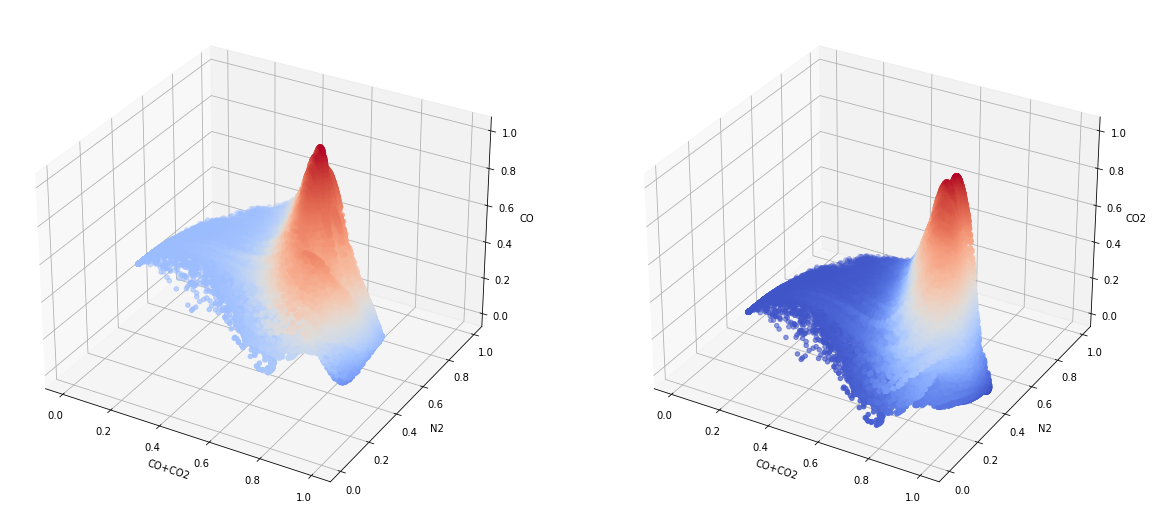

In [21]:
test_x = X_test[["CO+CO2", "H*", "O*", "C*"]]
test_y = X_test[["CO", "CO2"]]

plot_3d_subplot(test_x.to_numpy()[:, :2], test_y.to_numpy(), f"result/flame2-ann1-test.png")

### Ann2 Masses

In [22]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline


def plot_3d_subplot(x, y, savepath):
    '''
     x,y type: numpy 2darray
    '''
    fig = plt.figure(figsize=(20, 10))
    xline, yline, zline1, zline2 = x[:, 0], x[:, 1], y[:, 0], y[:, 1]

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_xlabel('CO+CO2', fontsize=10)
    ax1.set_ylabel('N2', fontsize=10)
    ax1.set_zlabel('W1', fontsize=10)
    ax1.scatter3D(xline, yline, zline1, c=zline1, cmap=cm.coolwarm)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_xlabel('CO+CO2', fontsize=10)
    ax2.set_ylabel('N2', fontsize=10)
    ax2.set_zlabel('W2', fontsize=10)
    ax2.scatter3D(xline, yline, zline2, c=zline2, cmap=cm.coolwarm)

    plt.savefig(savepath)

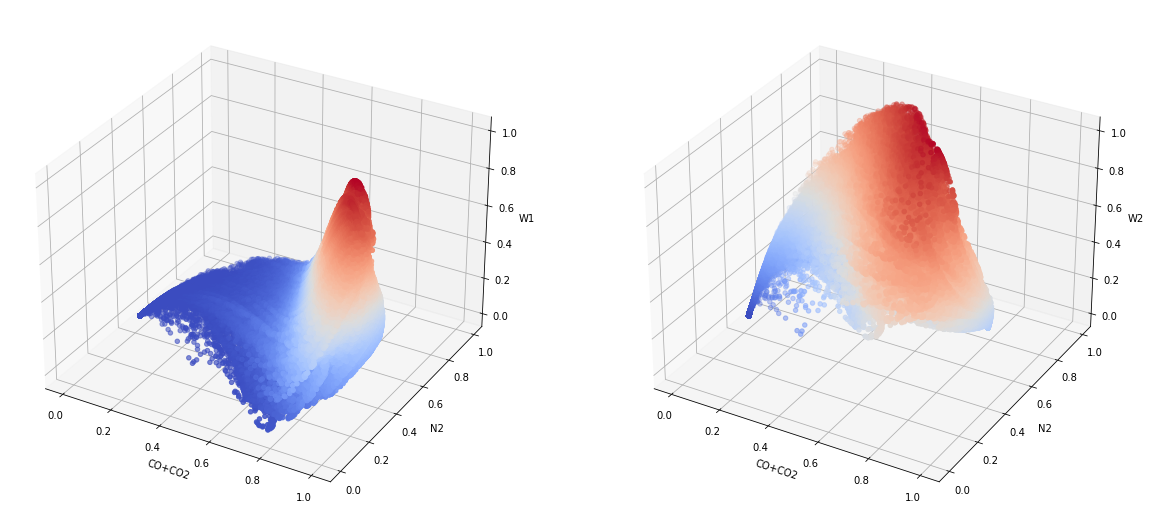

In [23]:
test_x = X_test[["CO+CO2", "H*", "O*", "C*"]]
test_y = X_test[["n2_out"+ f"{v}" for v in range(1, 51)]]

plot_3d_subplot(test_x.to_numpy()[:, :2], test_y.to_numpy(), f"result/flame2-ann2-test.png")

### Ann3 Temperature

In [24]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline


def plot_3d_subplot(x, y, savepath):
    '''
     x,y type: numpy 2darray
    '''
    fig = plt.figure(figsize=(20, 10))
    xline, yline, zline = x[:, 0], x[:, 1], y[:, 0]

    ax1 = plt.axes(projection='3d')
    ax1.set_xlabel('CO+CO2', fontsize=10)
    ax1.set_ylabel('N2', fontsize=10)
    ax1.set_zlabel('T', fontsize=10)
    ax1.scatter3D(xline, yline, zline, c=zline, cmap=cm.coolwarm)

    plt.savefig(savepath)

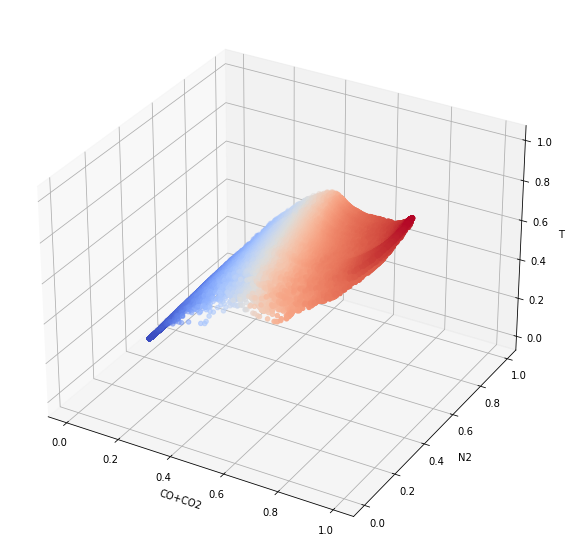

In [25]:
test_x = X_test[["CO+CO2", "H*", "O*", "C*"]]
test_y = X_test[["T"]]

plot_3d_subplot(test_x.to_numpy()[:, :2], test_y.to_numpy(), f"result/flame2-ann2-test.png")